## Clustering avanzado

Funcion para graficar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Limites de decision
def plot_clusters(X,model,n):
  model.fit(X)
  Y = model.predict(X)
  C = model.cluster_centers_
  x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
  y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,n), np.linspace(y_min,y_max,n))
  cm = plt.get_cmap('Spectral')
  z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=cm, alpha=0.6)
  plt.scatter(X[:,0],X[:,1],20.0,Y, cmap=cm)
  plt.scatter(C[:,0],C[:,1],30.0,'k')
  plt.show()

In [34]:
def plot_clf(X,model,n):
  Y = model.predict(X)
  x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
  y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,n), np.linspace(y_min,y_max,n))
  cm = plt.get_cmap('Spectral')
  z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=cm, alpha=0.6)
  plt.scatter(X[:,0],X[:,1],20.0,Y, cmap=cm)
  plt.show()

In [92]:
def plot_knn_dbscan(X,knn,dbscan,n):
  Y = dbscan.fit_predict(X)
  x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
  y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,n), np.linspace(y_min,y_max,n))
  cm = plt.get_cmap('brg')
  z = np.c_[xx.ravel(),yy.ravel()]
  #knn.predict(z)
  z_dist, z_pred_idx = knn.kneighbors(z, n_neighbors=1)
  z_pred = dbscan.labels_[dbscan.core_sample_indices_][z_pred_idx]
  z_pred[z_dist > 0.2] = -1
  #z_pred.ravel()
  z = z_pred.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=cm, alpha=0.2)
  plt.scatter(X[:,0],X[:,1],20.0,Y, cmap=cm)
  plt.show()

Dataset

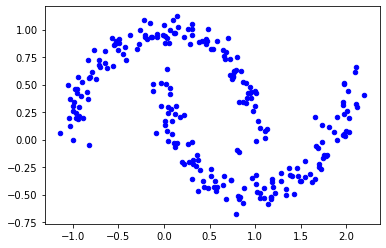

In [12]:
from sklearn.datasets import make_moons
X, Y = make_moons(250, noise=0.08, random_state=1)
plt.scatter(X[:,0],X[:,1],20.0,'b')
plt.show()

# DBSCAN

In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2)

In [57]:
%time
Y_p = dbscan.fit_predict(X)

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 14.1 µs


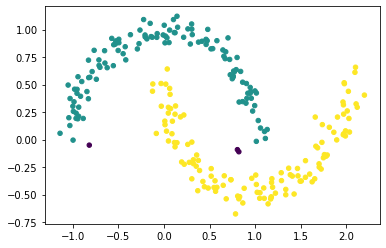

In [58]:
plt.scatter(X[:,0],X[:,1],20.0,Y_p)
plt.show()
#plot_clusters(X,DBSCAN(),150)

In [59]:
dbscan.core_sample_indices_

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

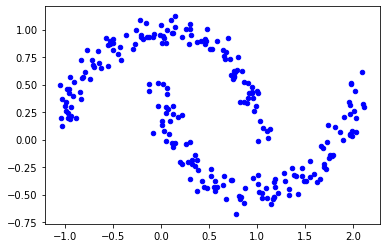

In [60]:
dbscan.components_
plt.scatter(dbscan.components_[:,0],dbscan.components_[:,1],20.0,'b')

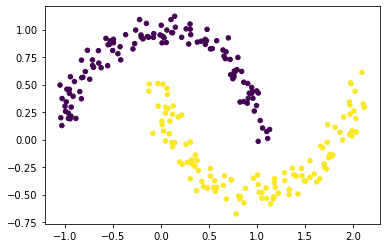

In [61]:
dbscan.labels_
plt.scatter(dbscan.components_[:,0],dbscan.components_[:,1],20.0,dbscan.labels_[dbscan.core_sample_indices_])

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=10)

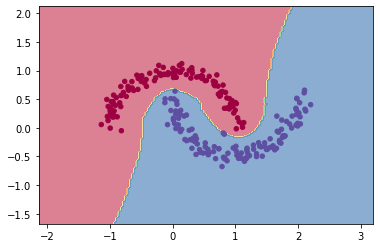

In [73]:
plot_clf(X,knn,150)

In [74]:
# Conjunto de prueba
X_2 = np.array([[-0.3, 0.5],[0.2, 0.1],[1, -0.1],[2, 1.5]])
knn.predict(X_2)

array([0, 1, 0, 1])

In [95]:
y_dist, y_pred_idx = knn.kneighbors(X_2, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([ 1,  1,  0, -1])

In [94]:
y_pred_idx

array([[204],
       [ 87],
       [143],
       [176]])

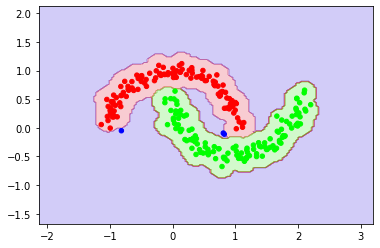

In [93]:
plot_knn_dbscan(X,knn,dbscan,150)

## Clustering espectral

In [106]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, gamma=20.0)
Y_p = sc.fit_predict(X)

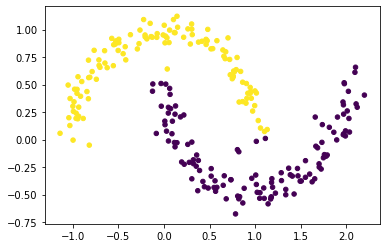

In [107]:
plt.scatter(X[:,0],X[:,1],20.0,Y_p)

In [108]:
knn = KNeighborsClassifier(10)
knn.fit(X,Y_p)

KNeighborsClassifier(n_neighbors=10)

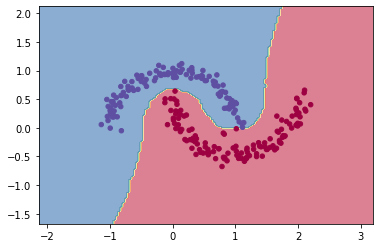

In [109]:
plot_clf(X,knn,150)